## Transformé de fourier

Il est difficile d'aborder le calcul numérique sans parler de transformé de Fourier (FT Fourier transforme) ou plus précisément de transformé de Fourier discréte (DFT discrete Fourier transforme). Au dela des propriété de la transformé de Fourier discréte, il est important de la considérer sous un ample de précision et d'erreur. Mais avant d'aborder ce point revenon aux fondamentaux.

La transformé de Fourier $\mathcal{F}$ d'une fonction $x$ intégrable sur $\mathbf{R}$ que l'on note $\mathcal{F}(x) = X(f)$ est définie par :

$$
X(f) = \int_{-\infty}^{+\infty} {x(t) \exp \left(- j 2 \pi f t \right) dt}
$$

Cependant d'un point de vus numérique nous ne pouvons pas réalisé cette opération de par la nature finie des ordinateurs. Pour approché cette opérateur nous somme amméner :

- à discrétiser la fonction temporelle $x$, 
- à tronqué cette série c'est-à-dire a en prendre un nombre finie d'échantillons et
- à discrétiser la fonction fréquencielle $X$.

En approchant cette intégralle par l'approche des rectangle ou du point milieux avec une discétisation $T_e$ pour échantillon nous avons :

$$
X(f) \approx T_e \sum_{n=-\infty}^{\infty} { x(n T_e) \exp \left(- j 2 \pi f n T_e \right) }
$$

Nous avons vus précédament que l'erreur d'approximation est de XXX.

Nous pouvons maintenant tronqué cette somme en fessant deux hypotheses perméttant de ne pas rajouter à l'erreur d'approximation. La premier est que la fonction $x$ est a support finie c'est a dire qu'il existe $t_0$ et $t_1$ quelle que $x(t)=0$ pour tout $t<=t_0$ et $t>=t_1$. De plus $t_0=0$ qui a faire un changement de variable $t \leftarrow t -t_0$. Sous ces deux hypothese nous pouvons rendre la somme finie.

$$
X(f) \approx T_e \sum_{n=0}^{N-1} { x(n T_e) \exp \left(- j 2 \pi f n T_e \right) }
$$

Avec $(N-1) T_e >= t_1$. Nous somme revenus a une opération que nous pouvons réaliser par ordinateur. Cependant de facons général nous ne calcul la transformé de Fourier en un seul point mais ni nous ne la considérons comme une fonction d'un point de vus informatique. En général nous la discrétison, nous en prenons un vecteur pour avoir le spectre sur une plage de fréquence.

Pour ce faire nous choisison les fréquence suivant la discrétisation $f_e / N$ avec $T_e = 1 / f_e$. Nous reviendrons plus longuement sur ce choix qui n'ai pas sans concéquence.

$$
X(k f_e / N) \approx T_e \sum_{n=0}^{N-1} { x(n T_e) \exp \left(- j 2 \pi k f_e T_e n / N \right) } = T_e \sum_{n=0}^{N-1} { x(n T_e) \exp \left(- j 2 \pi k n / N \right) }
$$

en abrégant $t_n = n T_e$ et $f_k = k f_e / N$ nous avons :

$$
X(f_k) \approx T_e \sum_{n=0}^{N-1} { x(t_n) \exp \left(- j 2 \pi k n / N \right) }
$$

On note transformé de Fourier discréte (DFT) tout suite de $N$ terme $x_n$, la suite $X_k$ également de $N$ termes, définie part :

$$
X_k = \sum_{n=0}^{N-1} { x_n \exp \left(- j 2 \pi k n / N \right) }
$$

A une constante pres ($T_e$) la DFT est une **approximation** de la transformé de Fourier d'un signal temporelle échantiollé à la fréquence $f_e$. Deplus la discrétisation du spectre est directement liée à la fréquence d'échantillonage $\Delta f = f_e / N$.

De maniére similaire l'inverse de la transformé de Fourier discréte est :

$$
x_n = \frac{1}{N} \sum_{k=0}^{N-1} { X_k \exp \left(j 2 \pi k n / N \right)}
$$

il est a noté qu'il existe d'autre définition qui joue sur la valeur du noyau et sur un facteur multiplicatife. C'est une histoire que convention.


### Impacte de la discrétisation du signal temporel

Nous avons vus que la premiére étape de notre développément a était de discrétiser la fonction intégrable $x(t) \to x(n / f_e)$. Au sense des distributions pour obtenir le $n$-ème terme nous devons multiplier la fonction $x$ par la distribution de diract $\delta(t - n / f_e)$. Ainsi la distribution assocer a la discrétisation de fréquence d'échantionnage $f_e$ note $x_e$ est donner par :

$$
x_e(t) = \sum_{n=-\infty}^{\infty} x(t) \delta(t - n / f_e) = x(t) P_{T_e}(t)
$$

Avec $P_{T_e}(t) = \sum_{n=-\infty}^{\infty} \delta(t - n / f_e)$ la fonction paigne. Comme nous le savons bien la transformé de Fourier d'un produite de distributions est la convolutions de leurs transformé de Fourier respective $\mathcal{F}(f \cdot g) = \mathcal{F}(f) * \mathcal{F}(g)$. De plus la transformé de Fourier d'un paigne diract est également un paigne de diract tel que : 

$$
\mathcal{F}(P_{T_e}) = f_e P_{f_e}(f) = f_e \sum_{n=-\infty}^{\infty} \delta(f - n f_e)
$$

La convolution d'un spectre par ce diract reviens a le translater de $n f_e$ :

$$
X(f) * \delta(f - n f_e) = X(f - n f_e)
$$

En prennant la somme du paigne de diract nous pouvons en déduite que la discrétisation a pour conséquence une répétition périodique de la transformé de Fourier du signal non discrétisé.

Ainsi si la fréquence d'échatinollage est petite par rapport au support du spectre de la fonction considérer nous avons ce qu'on appéle du recouvrement de spectre.


Dans l'exemple qui suit nous prenons une fonction de type gaussiene 

$$
x(t) = \exp( -(t - 3)^2)
$$

Dont la transformé de Fourier est :

$$
X(f) = \sqrt{\pi}  \exp( -(\pi f) ^ 2) \exp(-j 6 \pi f)
$$

Si nous prenons un $t_2=10$ pour $N=50$ nous obtenons une $f_e=5$. Nous constatons que nous avons bien une répérition périodeique tout le multiple de $f_e$.

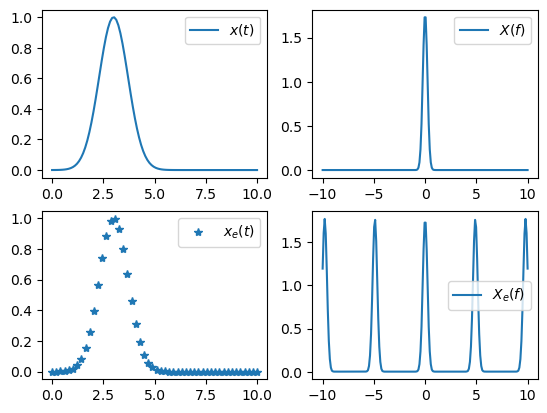

In [1]:
from smux.functions import Gaussian, TimeShift
from smux.dft import dft

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

N = 100
N2 = 50
t_fin = 10
Te = t_fin / N
fe = 1.0 / Te

t = np.linspace(0, t_fin, N)
t2 = np.linspace(0, t_fin, N2)
func = TimeShift(Gaussian(), tau=3)
f = np.linspace(-fe, fe, 2 * N)

axs[0, 0].plot(t, func(t), label="$x(t)$")
axs[0, 0].legend()
axs[0, 1].plot(f, np.abs(func.ft(f)), label="$X(f)$")
axs[0, 1].legend()

x2 = func(t2)
axs[1, 0].plot(t2, x2, "*", label="$x_e(t)$")
axs[1, 0].legend()
X2 = dft(x2, t2, f)
axs[1, 1].plot(f, np.abs(X2), label="$X_e(f)$")
axs[1, 1].legend()


En haut a gauche nous avons un tracer de la gausiene et a droite la transformé de Fourrier. En bas nous avons la discrétisation temporelle ainsi que la trasformé de Fourier discréte associé.

### Impacte de la trocature ou du fenetrage

La deuxieme étape consiste a prendre une série finie de terme dans la somme. Au sense des distributions faire cette troncature reviens a multiplier la précédente fonction par une fonction porte que nous noterons $\Pi_{T_0}$ avec $T_0 = N T_e$

$$
\Pi_{T_0}(t)
= 
\begin{cases}
    1 & \quad \text{si } t \in \left[-T_0/2, T_0/2\right]\\
    0 & \quad \text{si non} 
\end{cases}
$$

Nous rapellons que la transfromée de Fourier de la fonction port est :

$$
\mathcal{F}\left( \Pi_{T_0} \right) = T_0 \operatorname{sinc}(\pi f T_0) 
$$

De plus pour nous mettre dans la configuration identique au déroulement précédament utiliser nous devons "décaler" la fonction port de facons a ne conserver le signal entre $0$ et $T_0$. En d'autre mots utiliser la fonction $\Pi_{T_0}(t - T_0/2)$. Nous pouvons ainsi définir la fonction troncais par $x_{tf} = \Pi_{T_0}(t - T_0/2) \cdot x_e(t) = \Pi_{T_0}(t - T_0/2) \cdot x(t) \cdot P(t)$. 


La transformé de Fourier de cette fonction sobtien a partir de la trasformé de Fourier de la fonction port et du pic de Dirac décalé.

$$
\begin{align}
\mathcal{F}\left( \Pi_{T_0}(t - T_0/2) \right) 
 & = \mathcal{F}\left( \Pi_{T_0}(t) * \delta(t - T_0 / 2) \right) \\
 & = \mathcal{F}\left( \Pi_{T_0}(t) \right) \cdot \mathcal{F} \left( \delta(t - T_0 / 2) \right) \\
 & = T_0 \operatorname{sinc}(\pi f T_0) \cdot \exp\left(-j 2 \pi f T_0 / 2\right)\\
 & = T_0 \exp\left(-j \pi f T_0\right) \operatorname{sinc}(\pi f T_0)
\end{align}
$$

Noton que en exponentiel introduit par la translation est un terme de déphasague pure.

En définitive la troncature reviens à convoluer la transformé de Fouier par un sinus cardianal.

0.0003000150007501645 0.2


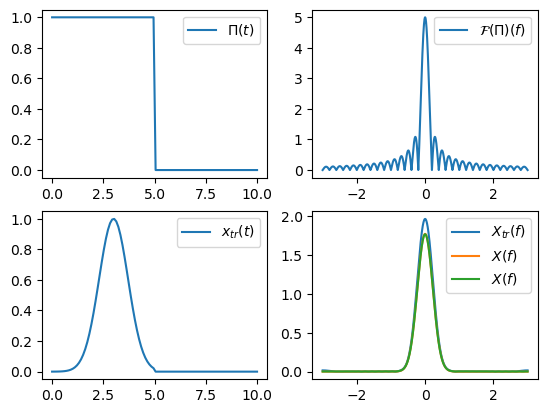

In [2]:
from smux.functions import Rect

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2)

N = 100
t_fin = 10
Te = t_fin / N
fe = 3  # 1./Te
T0 = 5

t = np.linspace(0, t_fin, N)
r = TimeShift(Rect(1 / T0), T0 / 2)
x = TimeShift(Gaussian(), 3)
f = np.linspace(-fe, fe, 200 * N)
print(f[1] - f[0], 1 / T0)

axs[0, 0].plot(t, r(t), label="$\Pi(t)$")
axs[0, 0].legend()
axs[0, 1].plot(f, np.abs(r.ft(f)), label="$\mathcal{F}(\Pi)(f)$")
axs[0, 1].legend()

x2 = x(t) * r(t)
axs[1, 0].plot(t, x2, label="$x_{tr}(t)$")
axs[1, 0].legend()
X = np.convolve(x.ft(f), r.ft(f), "same") / 3000
axs[1, 1].plot(f, np.abs(X), label="$X_{tr}(f)$")
axs[1, 1].plot(f, np.abs(x.ft(f)), label="$X(f)$")
axs[1, 1].plot(f, np.abs(dft(x(t) * r(t), t, f)), label="$X(f)$")

axs[1, 1].legend()


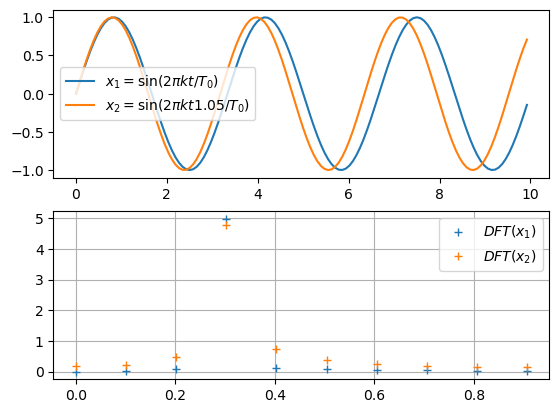

In [3]:
from numpy.fft import fft

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

N = 2**7
t_fin = 10
Te = t_fin / N
fe = 1.0 / Te

t = np.linspace(0, t_fin, N, endpoint=False)
f = np.linspace(0, fe, N)

k = 3
tau = t_fin / k
x_1 = np.sin(2 * np.pi * k / t_fin * t)
x_2 = np.sin(2 * np.pi * k * (1.05) / t_fin * t)

axs[0].plot(t, x_1, label="$x_1=\sin(2 \pi k t / T_0)$")
axs[0].plot(t, x_2, label="$x_2=\sin(2 \pi k t 1.05 / T_0)$")
axs[0].legend()

for i, x in enumerate((x_1, x_2)):
    X = dft(x, t, f)  # fft(x) / fe
    axs[1].plot(f[:10], np.abs(X)[:10], "+", label="$DFT(x_%d)$" % (i + 1))
axs[1].grid()
axs[1].legend()


51.2 56.32000000000001 5.1200000000000045


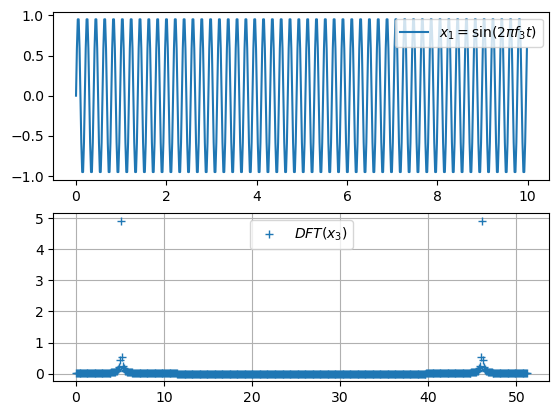

In [4]:
from numpy.fft import fft

import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2)

N = 2**9
t_fin = 10
Te = t_fin / N
fe = 1.0 / Te

t = np.linspace(0, t_fin, N, endpoint=False)
f = np.linspace(0, fe, N)

k = 3
tau = t_fin / k
x_1 = np.sin(2 * np.pi * k / t_fin * t)
fi = fe * 1.1  # + k / t_fin
x_2 = np.sin(2 * np.pi * fi * t)
print(fe, fi, fi - fe)

# axs[0].plot(t, x_1, label="$x_1=\sin(2 \pi k t / T_0)$")
axs[0].plot(t, x_2, label="$x_1=\sin(2 \pi f_3 t)$")
axs[0].legend()

for i, x in enumerate((x_2,)):
    X = dft(x, t, f)
    X_ = fft(x) / fe
    axs[1].plot(f, np.abs(X), "+", label="$DFT(x_3)$")
    # axs[1, 1].plot(f, np.abs(X_), ".", label="$FFT(x_1)$")
axs[1].grid()
axs[1].legend()


Filtre RLC

$$
\frac{V_c}{V_e} = \frac{1}{1 + RC j\omega + LC (j\omega)^2} = \frac{1}{1 + \frac{2 m}{\omega_0} j \omega + \left(\frac{ j \omega }{ \omega_0 } \right)^2 }
$$

avec $m$ le tau d'amortisement relié au facteur de qualité $Q = 1 / 2 m$ et $\omega_0$ la pulsation propre $\omega_0 = \sqrt{\frac{1}{LC}}$

la réponse impulsionelle est :

$$
v_c = \frac{\omega_0}{\sqrt{1-m^2}} \exp\left(-m \omega_0 t\right) \sin\left(\omega_0\sqrt{1-m^2} t\right)
$$

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


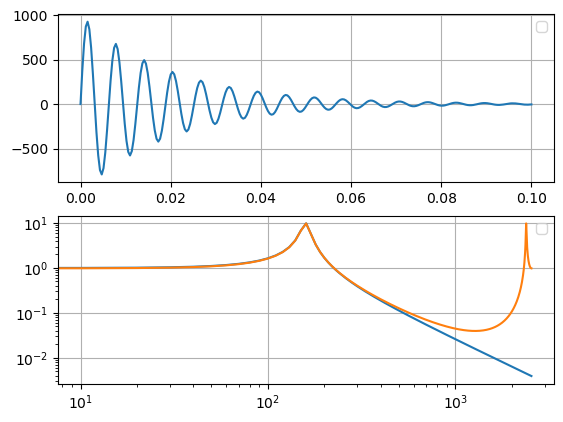

In [5]:
L = 1.0
C = 1e-6
R = 100.0
w_0 = 1.0 / np.sqrt(L * C)
m = R / 2 * np.sqrt(C / L)

N = 2**8
t = np.linspace(0.0, 0.1, N)
Te = t[1]
fe = 1 / Te
f = np.linspace(0.0, fe, N)


def h(t):
    return (
        w_0
        / np.sqrt(1 - m**2)
        * np.exp(-m * w_0 * t)
        * np.sin(w_0 * np.sqrt(1 - m**2) * t)
    )


def H(w):

    return 1 / (1 + (2 * m * 1.0j * w) / w_0 + (1.0j * w / w_0) ** 2)


fig, axs = plt.subplots(2)

u = h(t)
axs[0].plot(t, u)
axs[0].grid()
axs[0].legend()


w_lin = 2.0 * np.pi * f
f_log = np.logspace(np.log10(f[1]), np.log10(f[-1]), f.size)
w_log = f_log * 2.0 * np.pi

axs[1].loglog(f, np.abs(H(w_lin)))
# axs[1].loglog(f_log, np.abs(T(w_log)))

U = dft(u, t, f)
U_ = fft(u) / fe

axs[1].loglog(f, np.abs(U))
# axs[1].loglog(f, np.abs(U_))

axs[1].grid()
axs[1].legend()


$$
\frac{V_c}{V_e} = \frac{j L \omega}{R + j L \omega} = \frac{j \omega}{ R/L + j \omega}
$$

$$
\frac{V_c}{V_e} = j \omega \mathcal{F}\left( e^{-R/L t} u(t) \right)
$$

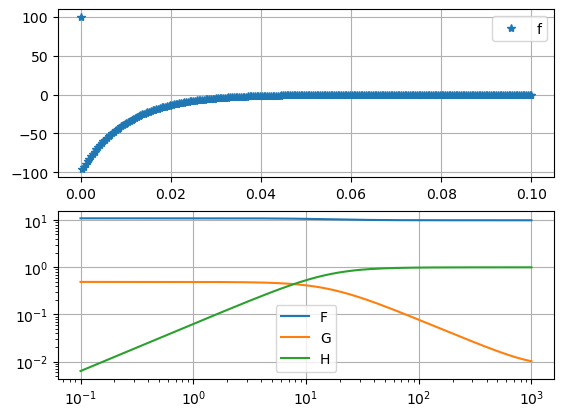

In [104]:
from smux.dft import idft

L = 1.0
R = 100.0
a = R / L

T = 10 / a
N = 2**8 + 1
t = np.linspace(0, T, N, endpoint=True)
Te = t[1]
fe = 1 / Te
f = np.linspace(0.0, fe, N)
f = np.logspace(-1, 3, 500)

w_lin = 2.0 * np.pi * f
f_log = np.logspace(np.log10(f[1]), np.log10(f[-1]), f.size)
w_log = f_log * 2.0 * np.pi


def h(t):
    return np.where(t >= 0, -a * np.exp(-a * t), 0)


def h3(x):
    return np.where(x == 0, a, h(t))


def h2(x):
    return 0.5 * (h(x) - h(-x))


def Href(w):
    return 1j * w / (a + 1j * w)


fig, axs = plt.subplots(2)

u = h3(t)
u2 = h2(t)
axs[0].plot(t, u, "*", label="f")
#axs[0].plot(t, u2, "+", label="g")
# axs[0].plot(t, idft(H(w_lin), f, t), label="h")
axs[0].grid()
axs[0].legend()


# axs[1].loglog(f_log, np.abs(T(w_log)))

U = dft(u, t, f)
U2 = dft(u2, t, f)
U_ = fft(u) / fe

axs[1].loglog(f, np.abs(U), label="F")
axs[1].loglog(f, np.abs(U2), label="G")
axs[1].loglog(f, np.abs(Href(w_lin)), label="H")

axs[1].grid()
axs[1].legend()


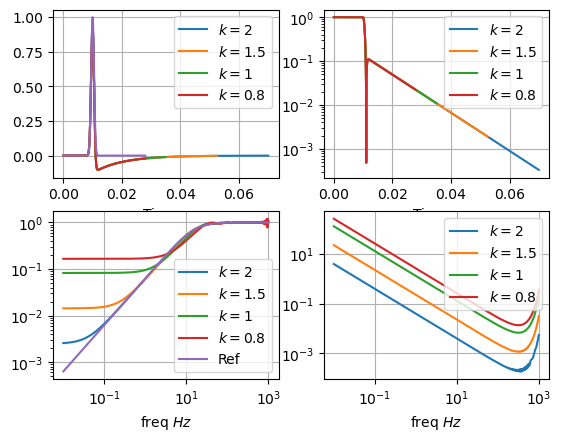

In [34]:
import numpy as np
from smux.functions import Gaussian, TimeShift

import matplotlib.pyplot as plt
from smux.dft import dft

def solve_rl(r, l, times, y):
    Dt = times[1] - times[0]
    K = (2 * l - r * Dt) / (2 * l + r * Dt)
    Q = (2 * l * Dt) / (2 * l + r * Dt)

    x = np.zeros_like(times)
    for i, time in enumerate(times[:-1]):
        x[i + 1] = K * x[i] + Q * y.diff()(time + 0.5 * Dt)

    return x


def decay(x):
    x = np.abs(x)
    j = np.argmax(x)
    d = x / np.max(x)
    d[np.arange(len(d)) < j] = 1
    return d


def transfer_function(x, times, Y, freqs):
    X = dft(x, times, freqs)
    return X / Y


def Href(r, l, freqs):
    a = r / l
    s = 2j * np.pi * freqs
    return s / (a + s)


L = 1.0
R = 100.0
tau = L / R

T = 3.5 * tau
Te = tau / 1000
N = int(T / Te)
Te = T / N
fe = 1 / Te
freqs = np.linspace(0.0, fe, N)
freqs = np.logspace(-2, 3, 500)
y = TimeShift(Gaussian(2e6), 0.01)

fig, axs = plt.subplots(2, 2)

for k in (2, 1.5, 1.0, 0.8):

    t = np.arange(int(N * k)) * Te
    label = "$k=%g$" % (k)

    x = solve_rl(R, L, t, y)
    axs[0, 0].plot(t, x, label=label)

    axs[0, 1].semilogy(t, decay(x), label=label)

    Y = dft(y(t), t, freqs)
    H = transfer_function(x, t, Y, freqs)
    axs[1, 0].loglog(freqs, np.abs(H), label=label)

    Hr = Href(R, L, freqs)
    axs[1, 1].loglog(freqs, np.abs(H - Hr) / np.abs(Hr), label=label)

axs[0,0].plot(t, y(t))
axs[0, 0].set_xlabel("Time $s$")
axs[0, 0].grid()
axs[0, 0].legend()

axs[0, 1].set_xlabel("Time $s$")
axs[0, 1].grid()
axs[0, 1].legend()

axs[1, 0].loglog(freqs, np.abs(Href(R, L, freqs)), label="Ref")
axs[1, 0].set_xlabel("freq $Hz$")
axs[1, 0].grid()
axs[1, 0].legend()

axs[1, 1].set_xlabel("freq $Hz$")
axs[1, 1].grid()
axs[1, 1].legend()


In [8]:
from incaphysics.sources.source import BiExpo

biexpo = BiExpo(10, 100)

fig, axs = plt.subplots(2)

axs[0].plot(t, biexpo.intime(t))
axs[0].grid()
axs[0].legend()

U, f = dft(u, t, 0, fe, N)
U_ = fft(u) / fe
axs[1].loglog(f, np.abs(biexpo.infreq(f)))
axs[1].grid()


ModuleNotFoundError: No module named 'incaphysics'

d:\build\adk\adk-3.5-440\adk-3.5\python37\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(0, 0.05)

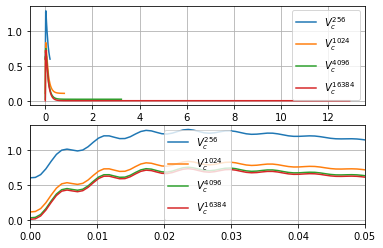

In [ ]:
from numpy.fft import ifft
from incaphysics.sources.source import BiExpo

biexpo = BiExpo(10, 100)

fig, axs = plt.subplots(2)

for n in (2**8, 2**10, 2**12, 2**14):
    t = np.linspace(0.0, Te * n, n, endpoint=False)

    f = np.linspace(0, fe, n, endpoint=False)
    V_c = H(2.0 * np.pi * f) * biexpo.inpuls(2.0 * np.pi * f)

    p = t.size // 2 + 1
    v_c = ifft(V_c) / (0.5 * Te)
    axs[0].plot(t, v_c, label="$V_c^{%d}$" % n)
    axs[1].plot(t, v_c, label="$V_c^{%d}$" % n)


axs[0].grid()
axs[0].legend()

axs[1].grid()
axs[1].legend()
axs[1].set_xlim((0, 0.05))


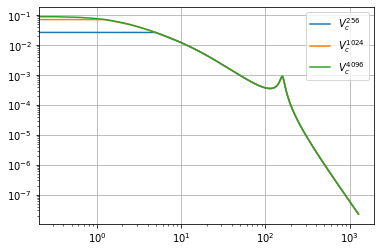

In [ ]:
fig, axs = plt.subplots()

for n in (2**8, 2**10, 2**12):
    f = np.linspace(0, fe, n, endpoint=False)
    V_c = H(2.0 * np.pi * f) * biexpo.inpuls(2.0 * np.pi * f)
    axs.loglog(f, np.abs(V_c), label="$V_c^{%d}$" % n)

axs.legend()
axs.grid()


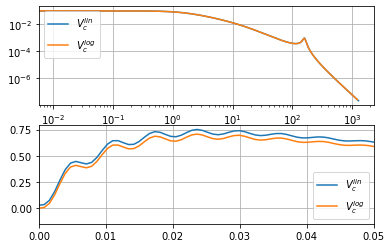

In [ ]:
from incamath.fft_physique import idft

fig, axs = plt.subplots(2)

n = 2**12
t = np.linspace(0.0, Te * n, n, endpoint=False)
f_lin = np.linspace(0, fe, n, endpoint=False)

V_c_lin = H(2.0 * np.pi * f_lin) * biexpo.inpuls(2.0 * np.pi * f_lin)
axs[0].loglog(f_lin, np.abs(V_c_lin), label="$V_c^{lin}$")

n = 2**8
f_log = np.logspace(-2, np.log10(f_lin[-1]), n, endpoint=False)
f_log[0] = f_lin[0]

V_c_log = H(2.0 * np.pi * f_log) * biexpo.inpuls(2.0 * np.pi * f_log)
axs[0].loglog(f_log, np.abs(V_c_log), label="$V_c^{log}$")

axs[0].legend()
axs[0].grid()


axs[1].plot(t, ifft(V_c_lin) / (0.5 * Te), label="$V_c^{lin}$")
v_c_log, t_log = idft(V_c_log, f_log, 0, t[-1], t.size)
axs[1].plot(t_log, v_c_log, label="$V_c^{log}$")


axs[1].set_xlim((0, 0.05))
axs[1].legend()
axs[1].grid()
